# Introduction to digital forensics of cybercrime
## Assignment 2 - Database forensics
### Project Group 4
    Loek van der Gugten 1975331
    Reinier de Ridder   1701134
    Frank Nijeboer      2011972
    Jos Bartels         1941224
    Dionne Kingma       2419874
    Hanneke Verschoor   1954334

## Motivation and Goals

## Methodology

## Data

In [21]:
from preprocessing import attack_df
import matplotlib.

In [22]:
attack_df

,id,processid,victim,port_service`_type,type,duration,time,stopped,client_attacker,server_used_in_th_attack
0,1,5672,91.214.20.52,80,ESSYN,33,1358989954,1,1,94.102.49.76
1,2,29065,91.214.20.52,80,UDP,1783,1358990329,1,1,93.174.93.30
2,3,23005,78.31.8.124,80,ESSYN,393,1358991360,0,1,89.248.172.97
3,4,29411,199.204.44.188,80,ESSYN,60,1358995416,0,4,93.174.93.30
4,5,19298,chrome-mods.com,80,RUDY,50000,1358995471,1,3,72.9.144.80
5,6,5764,174.120.6.116,53,ESSYN,50000,1358995498,1,3,94.102.49.76
6,7,24302,theblazingtech.com,80,RUDY,50000,1358995591,1,3,72.9.144.80
7,8,30056,77.92.131.135,80,UDP,60,1358995595,1,4,89.248.172.201
8,9,30060,198.154.220.66,80,ESSYN,50000,1358995611,1,3,93.174.93.30
9,10,30064,173.231.26.68,80,ESSYN,50000,1358995702,1,3,89.248.172.201


## Analysis

### The total number of attack records

In [46]:
attack_entries = attack_df.index
print(len(attack_entries))

48773


### Number of unique users

In [18]:
attackers = attack_df["client_attacker"].nunique()
print(attackers)

277


### The longest attack duration

In [26]:
duration = attack_df['duration'].max()
print(duration)

500000


### Top 3 attack type

In [32]:
attack_types = attack_df['type'].value_counts()
print(attack_types[:3])

ESSYN    19618
UDP      10505
RUDY      5808
Name: type, dtype: int64


### Which owner id performed most of the attacks

In [34]:
attack_id = attack_df['client_attacker'].mode()
print(attack_id)

0    272
dtype: int64
272    2307
Name: client_attacker, dtype: int64


### How many attacks 'krebsonsecurity.com' suffered

In [51]:
kreb_attacks = attack_df[attack_df.victim.str.contains('krebsonsecurity.com')]
print(len(kreb_attacks))

15


### Add two statistics that I didn't list above

#### How often is port 80 used in port_service_type

In [59]:
port80_attacks = attack_df[attack_df['port_service`_type']==80]
print(str(len(port80_attacks)) + ' out of ' + str(len(attack_entries)))
print(str(int(len(port80_attacks)/len(attack_entries)*100))+'%')

37571 out of 48773
77%


#### What percentage of attacks got stopped

In [60]:
stopped_attacks = attack_df[attack_df['stopped']==1]
print(str(len(stopped_attacks)) + ' out of ' + str(len(attack_entries)))
print(str(int(len(stopped_attacks)/len(attack_entries)*100))+'%')

27690 out of 48773
56%


## Conclusion

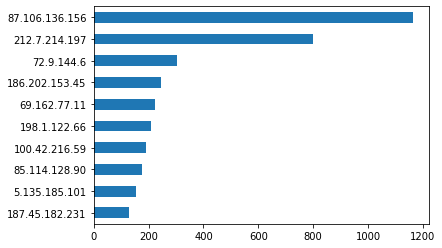

In [37]:
%matplotlib inline
victims_ips = attack_df[attack_df["victim"].str.contains("[0-9].[0-9].[0-9].[0-9]")]
victims_ips["victim"].value_counts().head(10).sort_values().plot.barh()

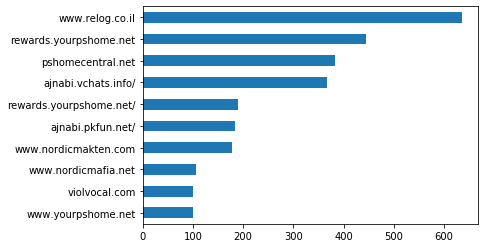

In [20]:
victim_domains = attack_df[attack_df["victim"].str.contains("[A-z]")]
victim_domains["victim"].value_counts().head(10).sort_values().plot.barh()